In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer
warnings.filterwarnings('ignore')

In [ ]:
properties_2016 = pd.read_csv('properties_2016.csv')
properties_2017 = pd.read_csv('properties_2017.csv')
train_2016 = pd.read_csv('train_2016_v2.csv')
train_2017 = pd.read_csv('train_2017.csv')
zillow_data_dictionary = pd.read_excel('zillow_data_dictionary.xlsx')
properties_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [ ]:
properties_2017.sample(5)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2861853,14686489,NaN,NaN,NaN,2.5,2.0,NaN,NaN,2.5,NaN,...,NaN,NaN,173180.0,400435.0,2016.0,227255.0,5329.32,NaN,NaN,6.059052e+13
2955010,11007538,1.0,NaN,NaN,2.0,2.0,NaN,6.0,2.0,NaN,...,NaN,NaN,59212.0,76373.0,2016.0,17161.0,1049.71,NaN,NaN,6.037106e+13
1140797,12392630,NaN,NaN,NaN,3.0,3.0,NaN,6.0,3.0,NaN,...,NaN,NaN,98000.0,440000.0,2016.0,342000.0,5590.99,Y,14.0,6.037501e+13
2951289,11306477,1.0,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,...,NaN,NaN,192700.0,285000.0,2016.0,92300.0,4150.44,NaN,NaN,6.037901e+13
91971,11052164,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,NaN,...,NaN,NaN,42637.0,59386.0,2016.0,16749.0,766.25,NaN,NaN,6.037110e+13


In [ ]:
train_2016.sample(5)

,parcelid,logerror,transactiondate
46234,12914044,0.0889,2016-06-16
64936,12018943,0.0469,2016-08-10
66796,10792661,0.0040,2016-08-16
49364,12853571,-0.0222,2016-06-24
20042,11079970,0.0188,2016-03-29


In [ ]:
zillow_data_dictionary

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


In [ ]:
properties_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   airconditioningtypeid         float64
 2   architecturalstyletypeid      float64
 3   basementsqft                  float64
 4   bathroomcnt                   float64
 5   bedroomcnt                    float64
 6   buildingclasstypeid           float64
 7   buildingqualitytypeid         float64
 8   calculatedbathnbr             float64
 9   decktypeid                    float64
 10  finishedfloor1squarefeet      float64
 11  calculatedfinishedsquarefeet  float64
 12  finishedsquarefeet12          float64
 13  finishedsquarefeet13          float64
 14  finishedsquarefeet15          float64
 15  finishedsquarefeet50          float64
 16  finishedsquarefeet6           float64
 17  fips                          float64
 18  fireplacecnt          

In [ ]:
properties_2016.shape

(2985217, 58)

In [ ]:
properties_2016.isna().sum()

,0
parcelid,0
airconditioningtypeid,2173698
architecturalstyletypeid,2979156
basementsqft,2983589
bathroomcnt,11462
bedroomcnt,11450
buildingclasstypeid,2972588
buildingqualitytypeid,1046729
calculatedbathnbr,128912
decktypeid,2968121


Видно, что у нас в данных очень много пропусков, с ними нужно как-то бороться. Сейчас это и проделаем.

Посмотрим, в каких признаках какие уникальные значения и сколько их.

In [ ]:
dct_columns_unique_2016 = {}
for col in properties_2016.columns:
    el = properties_2016[col].unique()
    if len(el) < 100:
      dct_columns_unique_2016[col] = properties_2016[col].unique()
    else:
      dct_columns_unique_2016[col] = ['many_values']

for el in dct_columns_unique_2016:
    print(el, dct_columns_unique_2016[el])


parcelid ['many_values']
airconditioningtypeid [nan  1. 13.  5. 11.  9. 12.  3.]
architecturalstyletypeid [nan  7. 21.  8.  2.  3.  5. 10. 27.]
basementsqft ['many_values']
bathroomcnt [ 0.    2.    4.    3.    1.    2.5   3.5   5.    1.5   4.5   7.5   5.5
  6.    7.   10.    8.    9.   12.   11.    8.5   6.5  13.    9.5  14.
 20.   19.5  15.   10.5    nan 18.   16.    1.75 17.   19.    0.5  12.5
 11.5  14.5 ]
bedroomcnt [ 0.  4.  5.  2.  3.  1.  6.  7.  8. 12. 11.  9. 10. 14. 16. 13. nan 15.
 17. 18. 20. 19.]
buildingclasstypeid [nan  3.  4.  5.  2.  1.]
buildingqualitytypeid [nan  7.  4. 10.  1. 12.  8.  3.  6.  9.  5. 11.  2.]
calculatedbathnbr [ nan  2.   4.   3.   1.   2.5  3.5  5.   1.5  4.5  7.5  5.5  6.   7.
 10.   8.   9.  12.  11.   8.5  6.5 13.   9.5 14.  20.  19.5 15.  10.5
 18.  16.  17.  19.  12.5 11.5 14.5]
decktypeid [nan 66.]
finishedfloor1squarefeet ['many_values']
calculatedfinishedsquarefeet ['many_values']
finishedsquarefeet12 ['many_values']
finishedsquarefeet13 [

In [ ]:
dct_columns_unique_2017 = {}
for col in properties_2016.columns:
    el = properties_2016[col].unique()
    if len(el) < 100:
      dct_columns_unique_2017[col] = properties_2016[col].unique()
    else:
      dct_columns_unique_2017[col] = ['many_values']

for el in dct_columns_unique_2017:
    print(el, dct_columns_unique_2017[el])

parcelid ['many_values']
airconditioningtypeid [nan  1. 13.  5. 11.  9. 12.  3.]
architecturalstyletypeid [nan  7. 21.  8.  2.  3.  5. 10. 27.]
basementsqft ['many_values']
bathroomcnt [ 0.    2.    4.    3.    1.    2.5   3.5   5.    1.5   4.5   7.5   5.5
  6.    7.   10.    8.    9.   12.   11.    8.5   6.5  13.    9.5  14.
 20.   19.5  15.   10.5    nan 18.   16.    1.75 17.   19.    0.5  12.5
 11.5  14.5 ]
bedroomcnt [ 0.  4.  5.  2.  3.  1.  6.  7.  8. 12. 11.  9. 10. 14. 16. 13. nan 15.
 17. 18. 20. 19.]
buildingclasstypeid [nan  3.  4.  5.  2.  1.]
buildingqualitytypeid [nan  7.  4. 10.  1. 12.  8.  3.  6.  9.  5. 11.  2.]
calculatedbathnbr [ nan  2.   4.   3.   1.   2.5  3.5  5.   1.5  4.5  7.5  5.5  6.   7.
 10.   8.   9.  12.  11.   8.5  6.5 13.   9.5 14.  20.  19.5 15.  10.5
 18.  16.  17.  19.  12.5 11.5 14.5]
decktypeid [nan 66.]
finishedfloor1squarefeet ['many_values']
calculatedfinishedsquarefeet ['many_values']
finishedsquarefeet12 ['many_values']
finishedsquarefeet13 [

In [ ]:
if set(properties_2016.columns) == set(properties_2017.columns):
   print('columns are the same')
else:
   print('columns are the different')

columns are the same


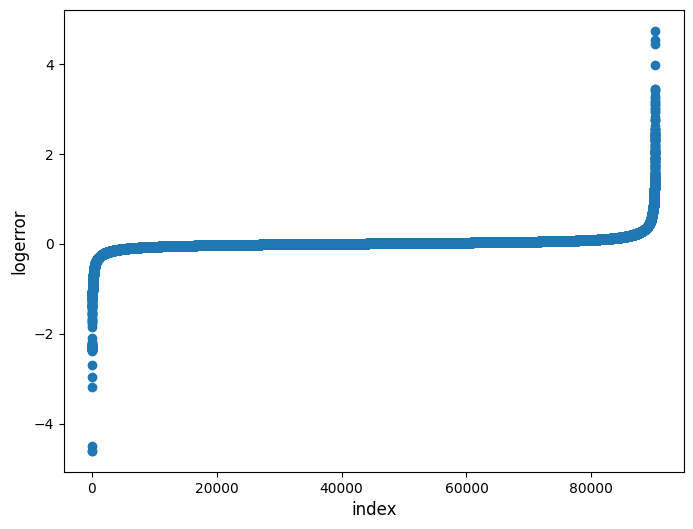

In [ ]:
plt.figure(figsize = (8, 6))
plt.scatter(range(train_2016.shape[0]), np.sort(train_2016.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

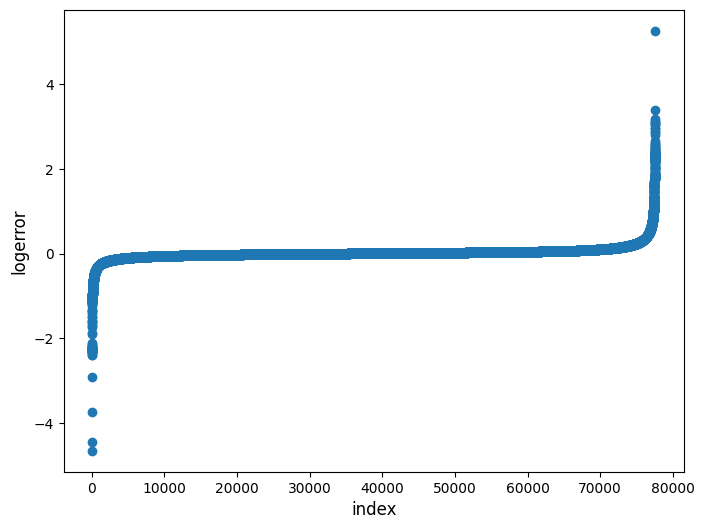

In [ ]:
plt.figure(figsize = (8, 6))
plt.scatter(range(train_2017.shape[0]), np.sort(train_2017.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

Уберем выбросы по logerror в train_2016 и train_2017.

In [ ]:
print('Размеры train_2016 {} и train_2017 {} соответветственно'.format(train_2016.shape, train_2017.shape))

Размеры train_2016 (90275, 3) и train_2017 (77613, 3) соответветственно


In [ ]:
ulimit_2016 = np.percentile(train_2016.logerror.values, 99)
llimit_2016 = np.percentile(train_2016.logerror.values, 1)
ulimit_2017 = np.percentile(train_2017.logerror.values, 99)
llimit_2017 = np.percentile(train_2017.logerror.values, 1)
train_2016 = train_2016[train_2016['logerror'] <= ulimit_2016]
train_2016 = train_2016[train_2016['logerror'] >= llimit_2016]
train_2017 = train_2017[train_2017['logerror'] <= ulimit_2017]
train_2017 = train_2017[train_2017['logerror'] >= llimit_2017]

In [ ]:
print('Размеры train_2016 {} и train_2017 {} соответветственно'.format(train_2016.shape, train_2017.shape))

Размеры train_2016 (87585, 3) и train_2017 (76059, 3) соответветственно


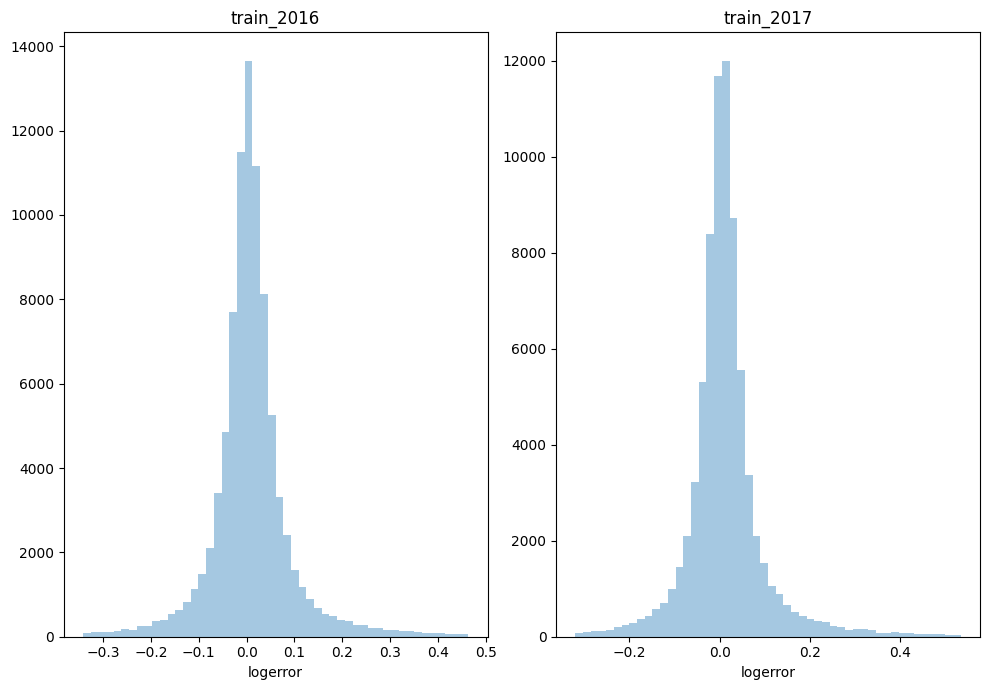

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize=(10,7))
sns.distplot(train_2016['logerror'], ax=ax[0], bins=50, kde=False)
sns.distplot(train_2017['logerror'], ax=ax[1], bins=50, kde=False)
ax[0].set_title('train_2016')
ax[1].set_title('train_2017')
plt.tight_layout()
plt.show()

Хорошие нормальные распределения получились.

In [ ]:
train_2016['transactiondate'] = pd.to_datetime(train_2016['transactiondate'], errors='coerce')
train_2017['transactiondate'] = pd.to_datetime(train_2017['transactiondate'], errors='coerce')
train_2016.head(5)

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


Преобразуем дату транзакции в месяц, так как в конечном итоге нас будет интересовать лишь месяц и год продажи.

In [ ]:
train_2016['transactiondate'] = train_2016['transactiondate'].dt.month
train_2017['transactiondate'] = train_2017['transactiondate'].dt.month
train_2016.head(5)

,parcelid,logerror,transactiondate
0,11016594,0.0276,1
1,14366692,-0.1684,1
2,12098116,-0.0040,1
3,12643413,0.0218,1
4,14432541,-0.0050,1


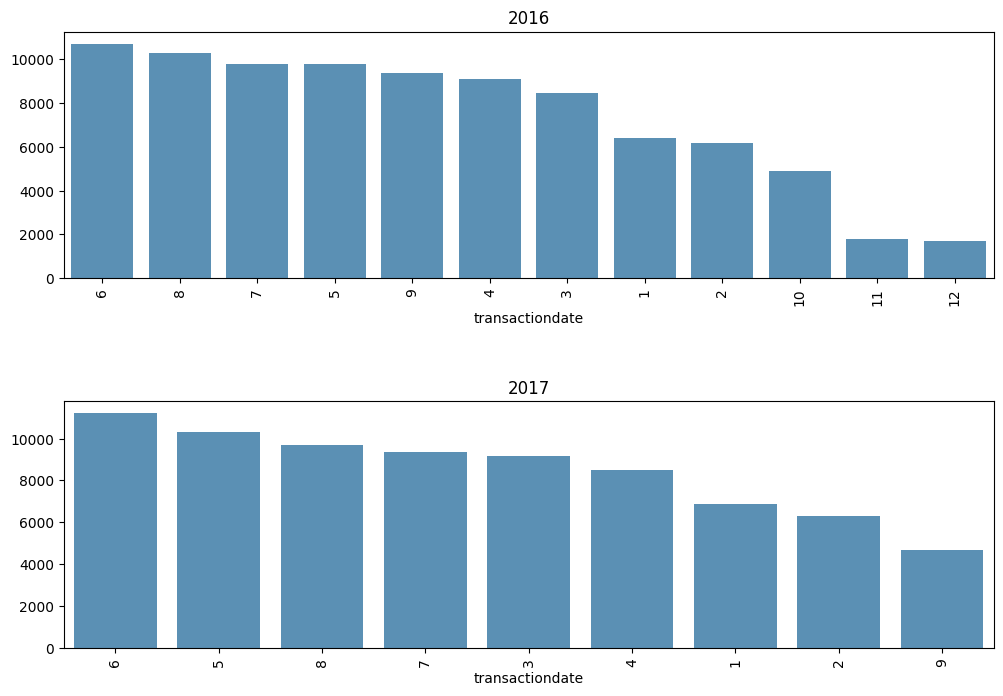

In [ ]:
cnts1 = train_2016['transactiondate'].value_counts()
cnts2 = train_2017['transactiondate'].value_counts()
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
sns.barplot(x=cnts1.index.astype(str), y=cnts1.values, ax=ax[0], alpha=0.8)
ax[0].set_title('2016')
sns.barplot(x=cnts2.index.astype(str), y=cnts2.values, ax=ax[1], alpha=0.8)
ax[1].set_title('2017')
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
plt.subplots_adjust(hspace=0.5)
plt.show()

Посмотрим на распределение пропусков по признакам в порядке убывания их числа.

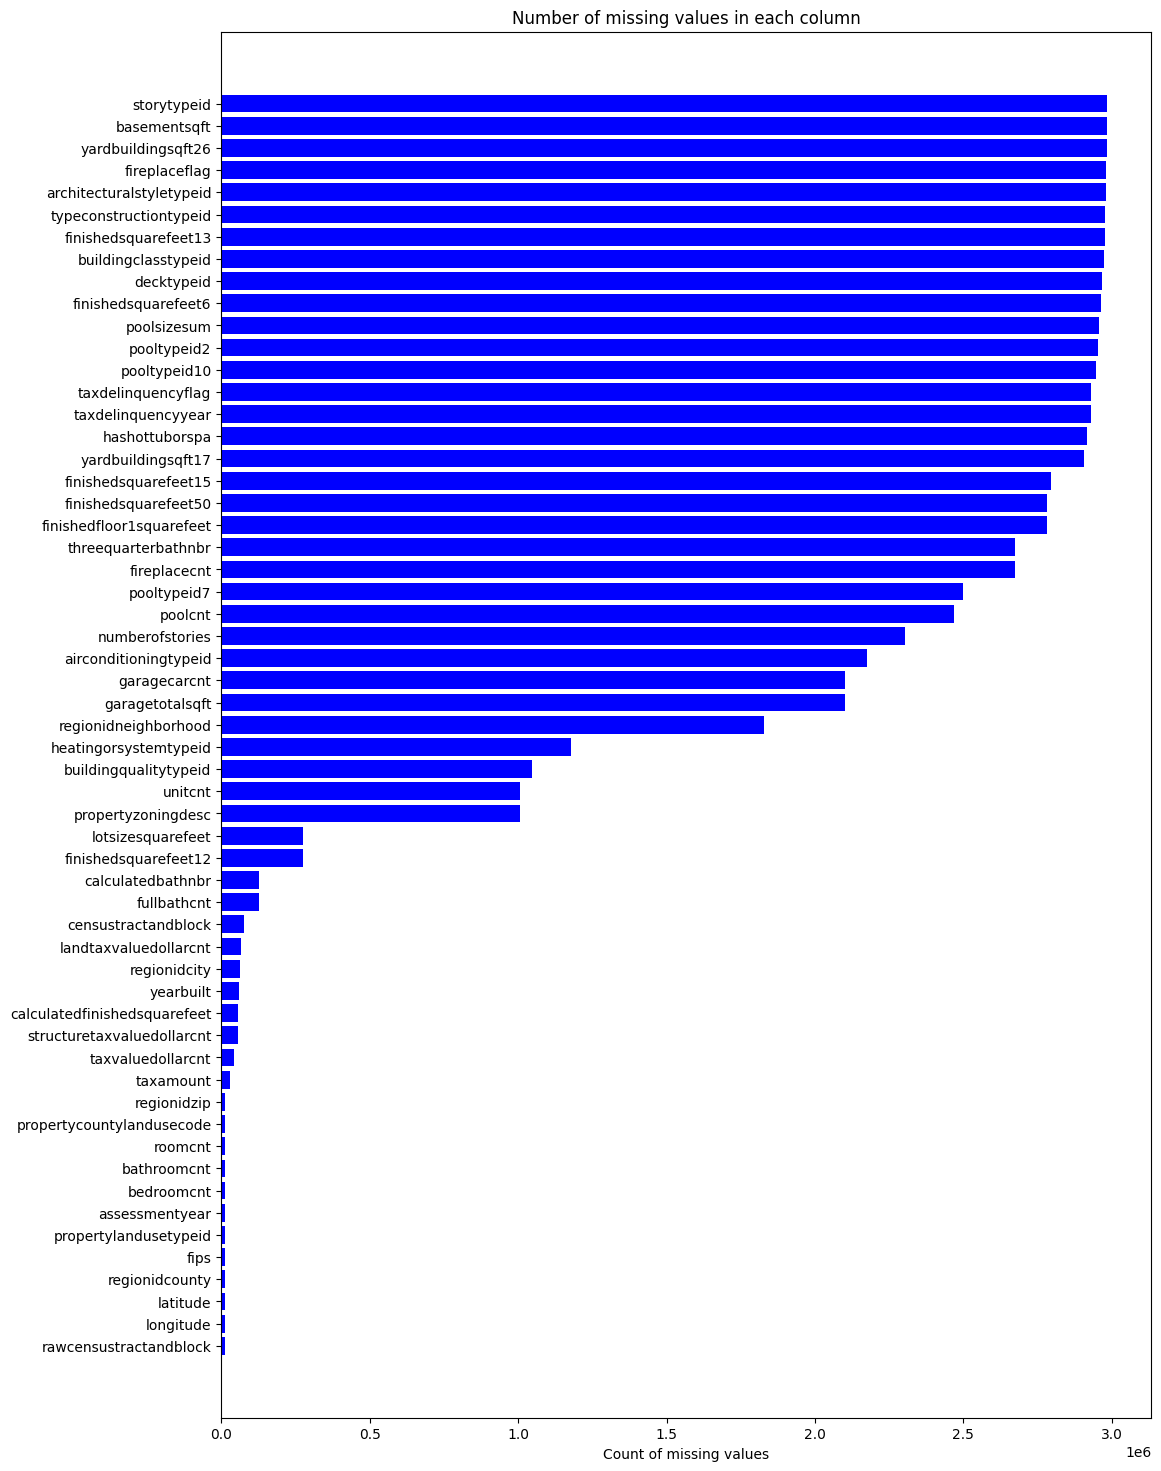

In [ ]:
missing_df = properties_2016.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'count']
missing_df = missing_df[missing_df['count'] > 0]
missing_df = missing_df.sort_values(by='count')
ind = np.arange(missing_df.shape[0])

fig, ax = plt.subplots(figsize=(12, 18))
rects = ax.barh(ind, missing_df['count'].values, color = 'blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

Красивый график распределения домов по карте америки.

<Figure size 1200x1200 with 0 Axes>

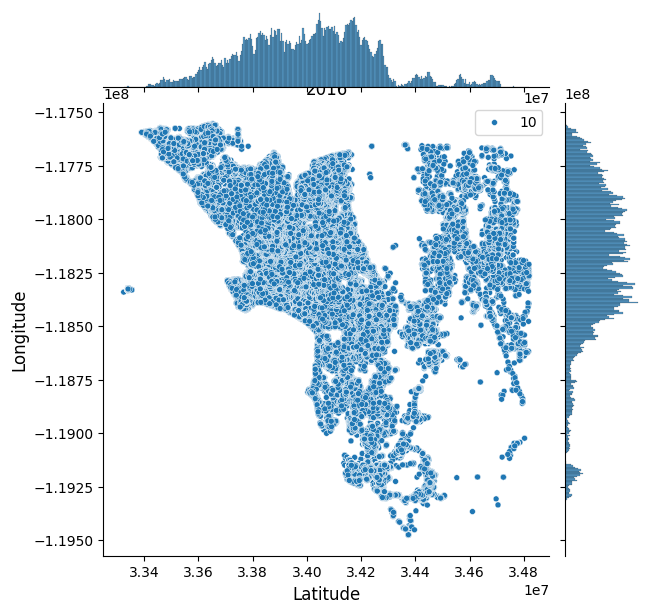

In [ ]:
plt.figure(figsize=(12,12))
sns.jointplot(x=properties_2016['latitude'].values, y=properties_2016['longitude'].values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.title('2016')
plt.show()

Соединим данные покупок за 2016 и 2017 года. Видно, что присутствуют не все дома заявленные в файлах properties_2016.csv и properties_2017.csv. Придется потом решать эту проблему.

In [ ]:
train_df_2016 = pd.merge(train_2016, properties_2016, on='parcelid', how='left')
train_df_2017 = pd.merge(train_2017, properties_2017, on='parcelid', how='left')
print(train_df_2016.shape, train_df_2017.shape)

(88473, 60) (76059, 60)


In [ ]:
data_types_2016 = train_df_2016.dtypes.reset_index()
data_types_2016.columns = ['name_column', 'type']

In [ ]:
data_types_count = data_types_2016.groupby(by='type').count()
data_types_count

,name_column
type,
int32,1
int64,1
float64,53
object,5


In [ ]:
missing_df = train_df_2016.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df_2016.shape[0]
missing_df = missing_df[missing_df['missing_ratio']>0.999]
missing_df

,column_name,missing_count,missing_ratio
5,basementsqft,88432,0.999537
8,buildingclasstypeid,88461,0.999864
15,finishedsquarefeet13,88443,0.999661
43,storytypeid,88432,0.999537


В 99.9 % элементах в этих признаках отсутствуют значения. Их можно удалить, так как они несут мало информации.

In [ ]:
missing_df = train_df_2017.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df_2017.shape[0]
missing_df = missing_df[missing_df['missing_ratio']>0.999]
missing_df

,column_name,missing_count,missing_ratio
5,basementsqft,76012,0.999382
8,buildingclasstypeid,76049,0.999869
15,finishedsquarefeet13,76021,0.999500
43,storytypeid,76012,0.999382
48,yardbuildingsqft26,75990,0.999093


Преобразуем все признаки, где всего 1 уникальный элемент(не считая nan) в бинарный признак.

In [ ]:
def convert_to_binary(df):
    for col in df.columns:
        # Проверяем, есть ли в столбце одно уникальное значение (без учета NaN)
        unique_values = df[col].dropna().unique()
        if len(unique_values) == 1:
            # Заменяем уникальное значение на True, а NaN на False
            df[col] = df[col].apply(lambda x: True if x == unique_values[0] else False)
    return df


In [ ]:
train_df_2016 = convert_to_binary(train_df_2016)
train_df_2017 = convert_to_binary(train_df_2017)
train_df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88473 entries, 0 to 88472
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      88473 non-null  int64  
 1   logerror                      88473 non-null  float64
 2   transactiondate               88473 non-null  int32  
 3   airconditioningtypeid         28379 non-null  float64
 4   architecturalstyletypeid      259 non-null    float64
 5   basementsqft                  41 non-null     float64
 6   bathroomcnt                   88473 non-null  float64
 7   bedroomcnt                    88473 non-null  float64
 8   buildingclasstypeid           88473 non-null  bool   
 9   buildingqualitytypeid         56062 non-null  float64
 10  calculatedbathnbr             87385 non-null  float64
 11  decktypeid                    88473 non-null  bool   
 12  finishedfloor1squarefeet      6765 non-null   float64
 13  c

In [ ]:
print(len(train_df_2016['propertyzoningdesc'].unique()))

1971


In [ ]:
train_df_2016['propertyzoningdesc'].fillna(train_df_2016['propertyzoningdesc'].mode()[0], inplace=True)
train_df_2016['propertycountylandusecode'].fillna(train_df_2016['propertycountylandusecode'].mode()[0], inplace=True)


In [ ]:
train_df_2017['propertyzoningdesc'].fillna(train_df_2017['propertyzoningdesc'].mode()[0], inplace=True)
train_df_2017['propertycountylandusecode'].fillna(train_df_2017['propertycountylandusecode'].mode()[0], inplace=True)


In [ ]:
train_df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88473 entries, 0 to 88472
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      88473 non-null  int64  
 1   logerror                      88473 non-null  float64
 2   transactiondate               88473 non-null  int32  
 3   airconditioningtypeid         28379 non-null  float64
 4   architecturalstyletypeid      259 non-null    float64
 5   basementsqft                  41 non-null     float64
 6   bathroomcnt                   88473 non-null  float64
 7   bedroomcnt                    88473 non-null  float64
 8   buildingclasstypeid           88473 non-null  bool   
 9   buildingqualitytypeid         56062 non-null  float64
 10  calculatedbathnbr             87385 non-null  float64
 11  decktypeid                    88473 non-null  bool   
 12  finishedfloor1squarefeet      6765 non-null   float64
 13  c

#Метод MICE
Можно было заполнить пропуски либо медианой для численных признаков, либо модой для категориальных признаков, но я решил попробовать метод MICE, который сложнее чем вышеописанный метод. В нем для каждого признака обучается своя модель(классификатор для категориальных признаков и регрессор для численных) и предсказывает, основываясь на других наблюдениях, что должно стоять на пропущенном месте. Будет работать дольше, но зато данные будут более реальными.

In [ ]:
from sklearn.experimental import enable_iterative_imputer  # Нужен для включения
from sklearn.impute import IterativeImputer

columns_ignore = ['propertyzoningdesc', 'propertycountylandusecode']
df_to_impute_2016 = train_df_2016.drop(columns=columns_ignore)
df_to_impute_2017 = train_df_2017.drop(columns=columns_ignore)

imputer1 = IterativeImputer(random_state=42)
df_imputed_2016 = imputer1.fit_transform(df_to_impute_2016)

df_imputed_2016 = pd.DataFrame(df_imputed_2016, columns=df_to_impute_2016.columns)

imputer2 = IterativeImputer(random_state=42)
df_imputed_2017 = imputer1.fit_transform(df_to_impute_2017)

df_imputed_2017 = pd.DataFrame(df_imputed_2017, columns=df_to_impute_2017.columns)
# Объединение с игнорируемыми столбцами
result_df_2016 = pd.concat([df_imputed_2016, train_df_2016[columns_ignore]], axis=1)
result_df_2017 = pd.concat([df_imputed_2017, train_df_2017[columns_ignore]], axis=1)

Здесь я сохранил данные, чтобы в следующий сеанс не повторять процедуру выше.

In [ ]:
result_df_2016.to_csv('result_df_2016.csv', index=False)
result_df_2017.to_csv('result_df_2017.csv', index=False)

In [ ]:
result_df_2016 = pd.read_csv('result_df_2016.csv')
result_df_2017 = pd.read_csv('result_df_2017.csv')

Добавляем новый признак - год.

In [ ]:
result_df_2016['year'] = 2016
result_df_2017['year'] = 2017
result_df_2016.head(5)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertyzoningdesc,propertycountylandusecode,year
0,11016594.0,0.0276,1.0,1.000000,2.907347e+02,-2.207971e+09,2.0,3.0,0.0,4.000000,...,360170.0,1.0,237416.0,6735.88,0.0,13.228785,6.037107e+13,LARS,0100,2016
1,14366692.0,-0.1684,1.0,105.843991,2.028819e+06,-2.048811e+08,3.5,4.0,0.0,-2081.790763,...,585529.0,1.0,239071.0,10153.02,0.0,14.183356,6.010045e+13,LAR1,1,2016
2,12098116.0,-0.0040,1.0,1.000000,2.568937e+02,-2.198530e+09,3.0,2.0,0.0,4.000000,...,119906.0,1.0,57912.0,11484.48,0.0,13.151224,6.037464e+13,PSR6,0100,2016
3,12643413.0,0.0218,1.0,1.000000,3.097715e+02,-2.202711e+09,2.0,2.0,0.0,4.000000,...,244880.0,1.0,73362.0,3048.74,0.0,13.473816,6.037296e+13,LAR3,010C,2016
4,14432541.0,-0.0050,1.0,68.688671,-6.829518e+01,-2.173751e+08,2.5,4.0,0.0,-2056.333825,...,434551.0,1.0,264977.0,5488.96,0.0,14.348404,6.059042e+13,LAR1,122,2016


В дальнейшем мы будет делать кросс-валидацию, но чтобы она работала корректно, мы должны отсортировать данные по времени. Также добавим лаговые признаки, чтобы модель могла уловить сезонность.

In [ ]:
result_train = pd.concat([result_df_2016, result_df_2017], axis=0)
result_train = result_train.sort_values(by=['parcelid', 'year', 'transactiondate'])

result_train['lag1'] = result_train.groupby(by='parcelid')['logerror'].shift(1)
result_train['lag2'] = result_train.groupby(by='parcelid')['logerror'].shift(2)

In [ ]:
result_train.shape

(164532, 63)

In [ ]:
result_train['lag1'].fillna(0, inplace=True)
result_train['lag2'].fillna(0, inplace=True)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.2 MB/s eta 0:00:00


#Модель и обучение
У нас получилось много признаков, поэтому для хорошего конечного результата лучше всего воспользоваться продвинутым методом ансамблирования - stacking. В качестве метамоделей возьмем два градиентных бустинга и случайный лес. В качестве конечной модели возьмем xgboost, но с другими гиперпараметрами, чтобы избежать преобучения.

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

xgb1_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}

xgb2_params = {
      'eta': 0.02,
      'objective': 'reg:linear',
      'eval_metric':'mae',
      'max_depth': 4,
      'silent':1
}

catboost_params = {
    'iterations': 500,
    'learning_rate': 0.05,
    'depth': 6,
    'bagging_temperature': 0.6,
    'random_strength': 0.2,
    'verbose': 0
}

estimators = [
    ('xgb', XGBRegressor(**xgb2_params)),
    ('rf', RandomForestRegressor(n_estimators=100)),
    ('cat', CatBoostRegressor(**catboost_params))
]
final_estimator = XGBRegressor(**xgb1_params)

stacking = StackingRegressor(estimators=estimators, final_estimator=final_estimator)


#Кросс валидация для временных рядов
Воспользуемся TimeSeriesSplit для корректной работы и обучим нашу модель на 5 фолдах.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error

X = result_train.drop(columns=['logerror', 'propertyzoningdesc', 'propertycountylandusecode'])
y = result_train['logerror']

time_split = TimeSeriesSplit(n_splits=5)
split = 1
mas_metrics = []
for train_ind, test_ind in time_split.split(result_train):
  X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
  X_test, y_test = X.iloc[test_ind], y.iloc[test_ind]
  stacking.fit(X_train, y_train)
  y_pred = stacking.predict(X_test)
  print("absolute error on {}: {}".format(split, mean_absolute_error(y_test, y_pred)))
  mas_metrics.append(mean_absolute_error(y_test, y_pred))
  split += 1


absolute error on 1: 0.06101885629517931
absolute error on 2: 0.060641928073622
absolute error on 3: 0.04611642037151628
absolute error on 4: 0.04759462774182888
absolute error on 5: 0.052120377863570266


In [ ]:
print('Mean absolute error: ', np.mean(mas_metrics))

Mean absolute error:  0.05349844206914335


In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission.shape

(2985217, 7)

Скор получился довольно хороший. Давайте наконец сделаем предикты.

In [ ]:
properties_2016 = pd.read_csv('properties_2016.csv')
properties_2016.shape

(2985217, 58)

#Получение конечных предиктов.

In [ ]:
X_test1 = result_train.drop(columns=['logerror', 'propertyzoningdesc', 'propertycountylandusecode'])
X_test1['transactiondate'] = 10
X_test1['year'] = 2016
pred1 = stacking.predict(X_test1)

In [ ]:
pred1 = pd.DataFrame(pred1, columns=['201610']).reset_index(drop=True)
result_train = result_train.reset_index(drop=True)
pred1['ParcelId'] = result_train['parcelid']

In [ ]:
X_test2 = result_train.drop(columns=['logerror', 'propertyzoningdesc', 'propertycountylandusecode'])
X_test2['transactiondate'] = 11
X_test2['year'] = 2016
pred2 = stacking.predict(X_test2)

In [ ]:
pred2 = pd.DataFrame(pred2, columns=['201611']).reset_index(drop=True)
pred2['ParcelId'] = result_train['parcelid']

In [ ]:
X_test3 = result_train.drop(columns=['logerror', 'propertyzoningdesc', 'propertycountylandusecode'])
X_test3['transactiondate'] = 12
X_test3['year'] = 2016
pred3 = stacking.predict(X_test3)

In [ ]:
pred3 = pd.DataFrame(pred3, columns=['201612']).reset_index(drop=True)
pred3['ParcelId'] = result_train['parcelid']

In [ ]:
X_test4 = result_train.drop(columns=['logerror', 'propertyzoningdesc', 'propertycountylandusecode'])
X_test4['transactiondate'] = 10
X_test4['year'] = 2017
pred4 = stacking.predict(X_test4)

In [ ]:
pred4 = pd.DataFrame(pred4, columns=['201710']).reset_index(drop=True)
pred4['ParcelId'] = result_train['parcelid']

In [ ]:
X_test5 = result_train.drop(columns=['logerror', 'propertyzoningdesc', 'propertycountylandusecode'])
X_test5['transactiondate'] = 11
X_test5['year'] = 2017
pred5 = stacking.predict(X_test5)

In [ ]:
pred5 = pd.DataFrame(pred5, columns=['201711']).reset_index(drop=True)
pred5['ParcelId'] = result_train['parcelid']

In [ ]:
X_test6 = result_train.drop(columns=['logerror', 'propertyzoningdesc', 'propertycountylandusecode'])
X_test6['transactiondate'] = 12
X_test6['year'] = 2017
pred6 = stacking.predict(X_test6)

In [ ]:
pred6 = pd.DataFrame(pred6, columns=['201712']).reset_index(drop=True)
pred6['ParcelId'] = result_train['parcelid']

In [ ]:
pred_all = pd.merge(pred1, pred2, on='ParcelId', how='left')

pred_all.head(5)

,201610,ParcelId,201611
0,0.009869,10711738.0,0.009869
1,-0.060549,10711755.0,-0.060549
2,-0.092649,10711805.0,-0.092649
3,0.009778,10711816.0,0.007847
4,-0.000240,10711855.0,-0.004927


In [ ]:
pred_all = pd.merge(pred_all, pred3, on='ParcelId', how='left')
pred_all = pd.merge(pred_all, pred4, on='ParcelId', how='left')
pred_all = pd.merge(pred_all, pred5, on='ParcelId', how='left')
pred_all = pd.merge(pred_all, pred6, on='ParcelId', how='left')
pred_all = pred_all[['ParcelId','201610', '201611', '201612', '201710', '201711', '201712']]
pred_all.head(5)

,ParcelId,201610,201611,201612,201710,201711,201712
0,10711738.0,0.009869,0.009869,0.009869,0.009869,0.009869,0.009869
1,10711755.0,-0.060549,-0.060549,-0.062172,-0.060549,-0.060549,-0.062172
2,10711805.0,-0.092649,-0.092649,-0.092649,-0.092649,-0.092649,-0.092649
3,10711816.0,0.009778,0.007847,0.007847,0.009778,0.007847,0.007847
4,10711855.0,-0.000240,-0.004927,-0.004927,-0.000240,-0.004927,-0.004927


In [ ]:
pred_all = pred_all.drop_duplicates('ParcelId')

(162075, 7)

In [ ]:
submission.set_index('ParcelId', inplace=True)
pred_all.set_index('ParcelId', inplace=True)
submission.update(pred_all)
submission.sample(10)

KeyError: "None of ['ParcelId'] are in the columns"

In [ ]:
means = submission.replace(0, np.nan).mean()
means

,0
201610,0.001802
201611,0.000182
201612,0.000288
201710,0.001800
201711,0.000182
201712,0.000288


In [ ]:
for col in ['201610', '201611', '201612', '201710', '201711', '201712']:
    submission[col] = submission[col].apply(lambda x: means[col] if x == 0 else x)
submission.head()

,201610,201611,201612,201710,201711,201712
ParcelId,,,,,,
10754147,0.001802,0.000182,0.000288,0.0018,0.000182,0.000288
10759547,0.001802,0.000182,0.000288,0.0018,0.000182,0.000288
10843547,0.001802,0.000182,0.000288,0.0018,0.000182,0.000288
10859147,0.001802,0.000182,0.000288,0.0018,0.000182,0.000288
10879947,0.001802,0.000182,0.000288,0.0018,0.000182,0.000288


In [ ]:
submission.reset_index(inplace=True)

# Переименование индекса, если нужно
submission.rename(columns={'ParcelId': 'ParcelId'}, inplace=True)

# Перемещение столбца 'id' на первое место
submission = submission[['ParcelId'] + [col for col in submission.columns if col != 'ParcelId']]
submission.head(5)

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.001802,0.000182,0.000288,0.0018,0.000182,0.000288
1,10759547,0.001802,0.000182,0.000288,0.0018,0.000182,0.000288
2,10843547,0.001802,0.000182,0.000288,0.0018,0.000182,0.000288
3,10859147,0.001802,0.000182,0.000288,0.0018,0.000182,0.000288
4,10879947,0.001802,0.000182,0.000288,0.0018,0.000182,0.000288


In [ ]:
submission.to_csv('submission.csv', index=False)